In [1]:
#数据加载
from keras.datasets import fashion_mnist
import numpy as np
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()
print(type(X_train),X_train.shape)

4431872/4422102 [==============================] - 1s 0us/step
<class 'numpy.ndarray'> (60000, 28, 28)


Text(0.5, 1.0, 'raw img 1')

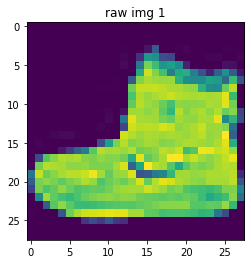

In [4]:
#样本可视化
img1=X_train[0]
from matplotlib import pyplot as plt
fig1=plt.figure()
plt.imshow(img1)
plt.title('raw img 1')

In [5]:
#输入数据预处理
feature_size = img1.shape[0]*img1.shape[1]
print(feature_size)
X_train_format = X_train.reshape(X_train.shape[0],feature_size)
X_test_format = X_test.reshape(X_test.shape[0],feature_size)
print(X_train_format.shape,X_train.shape)

784
(60000, 784) (60000, 28, 28)


In [6]:
#数据的归一化处理
X_train_normal = X_train_format/255
X_test_normal = X_test_format/255
print(X_train_normal[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00392157 0.         0.         0.05098039 0.28627451 

In [9]:
#输出结果的数据预处理
from tensorflow.python.keras.utils.np_utils import to_categorical
y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)
print(y_train[0])
print(y_train_format[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [10]:
print(y_train.shape,y_train_format.shape)

(60000,) (60000, 10)


In [11]:
#建立mlp模型
from keras.models import Sequential
from keras.layers import Dense, Activation

mlp = Sequential()
mlp.add(Dense(units = 392, input_dim = 784, activation='relu'))
mlp.add(Dense(units = 196, activation='relu'))
mlp.add(Dense(units=10, activation='softmax'))
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 392)               307720    
_________________________________________________________________
dense_1 (Dense)              (None, 196)               77028     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1970      
Total params: 386,718
Trainable params: 386,718
Non-trainable params: 0
_________________________________________________________________


In [12]:
#参数配置
mlp.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [13]:
#模型训练
mlp.fit(X_train_normal, y_train_format, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 2ms/step - loss: 0.5838 - categorical_accuracy: 0.7888
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3554 - categorical_accuracy: 0.8703
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3268 - categorical_accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3064 - categorical_accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2789 - categorical_accuracy: 0.8977
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - categorical_accuracy: 0.8996
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2425 - categorical_accuracy: 0.9077
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2352 - categorical_accuracy: 0.9111
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2263 - ca

In [14]:
#结果预测
y_train_predict = mlp.predict_classes(X_train_normal)
print(y_train_predict[0:10])
print(type(y_train_predict))

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[9 0 0 3 0 2 7 4 5 5]
<class 'numpy.ndarray'>


In [15]:
#表现评估
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

0.9235833333333333


In [16]:
y_test_predict = mlp.predict_classes(X_test_normal)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.8899


In [18]:
#创建结果标签字典
label_dic={0:'T shirt',1:'裤子',2:'套头衫',3:'裙子',4:'外套 ',5:'凉鞋',6:'衬衫',7:'运动鞋',8:'包 ',9:'踝靴'}
print(label_dic)

{0: 'T shirt', 1: '裤子', 2: '套头衫', 3: '裙子', 4: '外套 ', 5: '凉鞋', 6: '衬衫', 7: '运动鞋', 8: '包 ', 9: '踝靴'}


Text(0.5, 1.0, '包 ')

C:\Users\zheng\anaconda3\envs\Python_course\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\zheng\anaconda3\envs\Python_course\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0, flags=flags)


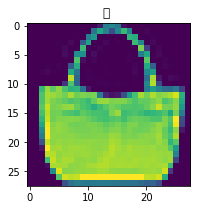

In [19]:
#样本可视化
img1 = X_train[100]
fig2 = plt.figure(figsize=(3,3))
plt.imshow(img1)
plt.title(label_dic[y_train_predict[100]])

[1, 2, 3, 4, 5, 6, 7, 8, 9]


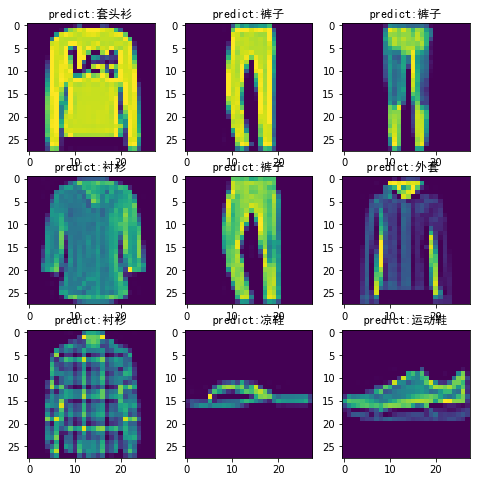

In [20]:
a = [i for i in range(1,10)]
print(a)
fig4 = plt.figure(figsize=(8,8))
font2 = {'family': 'SimHei'}


for i in a:
    plt.subplot(3,3,i)
    plt.imshow(X_test[i])
    plt.title('predict:{}'.format(label_dic[y_test_predict[i]]),font2)